<a href="https://colab.research.google.com/github/PaulaDiz/LABORATORIOS/blob/main/LAB01_Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 1: 	Vacunación	COVID**

A finales de 2020 empezó la vacunación del COVID-19 que ha producido la mayor pandemia mundial que se
recuerda. Algunos países en vista de los problemas que puedan causar futuras pandemias quieren saber
qué país está llevando el plan de vacunación más eficiente. En España, el Centro de Biología Molecular
Severo Ochoa donde participa la Doctora Margarita del Val. Para ello vamos a obtener cual es la evolución
del número de vacunados en el tiempo usando el set de datos vacunaciones.csv.

## 1. Lo primero será evitar los “missing values” de la columna “people vaccinated”.
## Para ello se comienza cargando el csv donde se encuentran los datos, y observando qué variables pueden tener missing values. En el caso de la columna people vaccinated, para rellenar las celdas, se cogerán los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para rellenar dicha celda.

In [ ]:
#Cargamos la base de datos vacunaciones.csv
import pandas as pd
df = pd.read_csv('vacunaciones.csv')

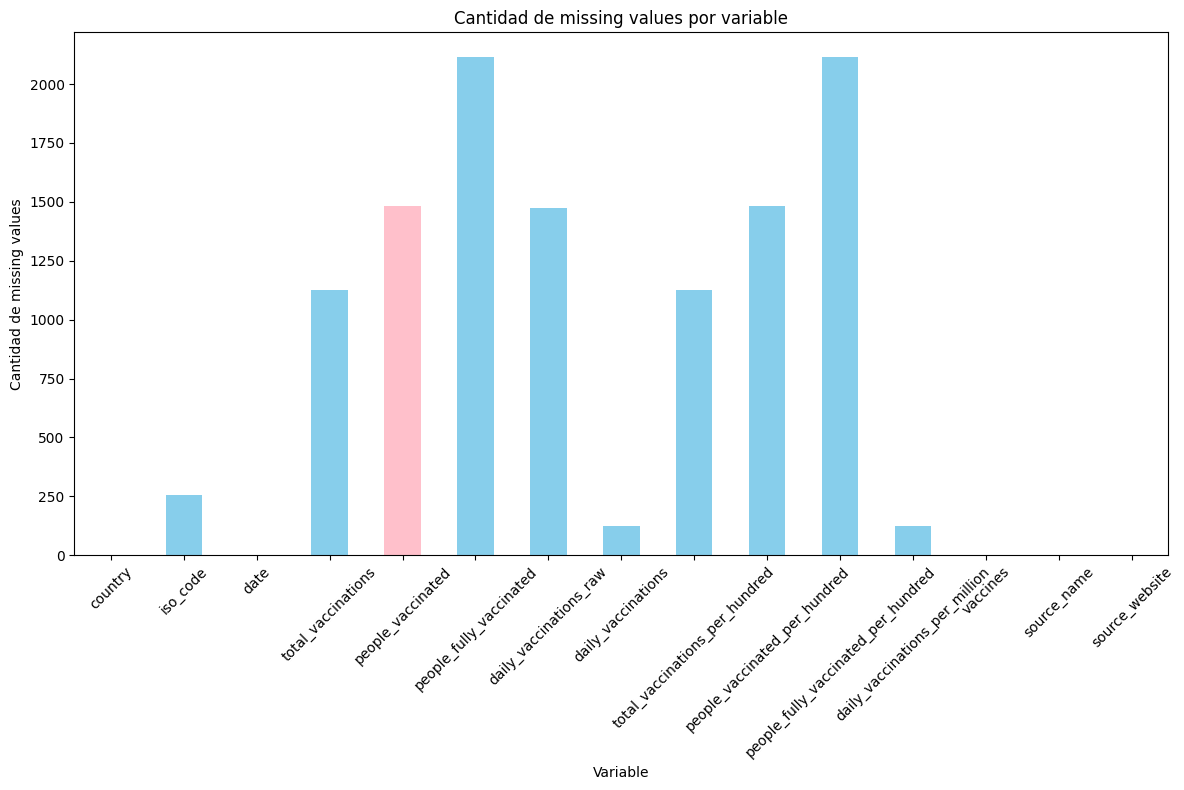

El total de missing values en people vaccinated es: 1481


In [ ]:
import matplotlib.pyplot as plt

# Calculamos la cantidad de valores faltantes en cada variable
missing_values_count = df.isnull().sum()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
colors = ['skyblue'] * len(missing_values_count)
colors[4] = 'pink'
missing_values_count.plot(kind='bar', color=colors)
plt.title('Cantidad de missing values por variable')
plt.xlabel('Variable')
plt.ylabel('Cantidad de missing values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

missing_values_count = df['people_vaccinated'].isnull().sum()
print('El total de missing values en people vaccinated es:',missing_values_count)


En la gráfica se observa que distintas variables contienen missing values. Pero de momento la columna que nos interesa es la de people_vaccinated, que en el siguiente código se rellena con la media como se ha descrito antes.

In [ ]:
# Cálculamos la media y relleno de celdas
for i in range(len(df)):
    if pd.isnull(df.loc[i, 'people_vaccinated']):
        sum_values = 0
        count_values = 0
        for j in range(1, 4):
            if i - j >= 0:
                if not pd.isnull(df.loc[i - j, 'people_vaccinated']):
                    sum_values += df.loc[i - j, 'people_vaccinated']
                    count_values += 1
        if count_values > 0:
            df.loc[i, 'people_vaccinated'] = sum_values / count_values

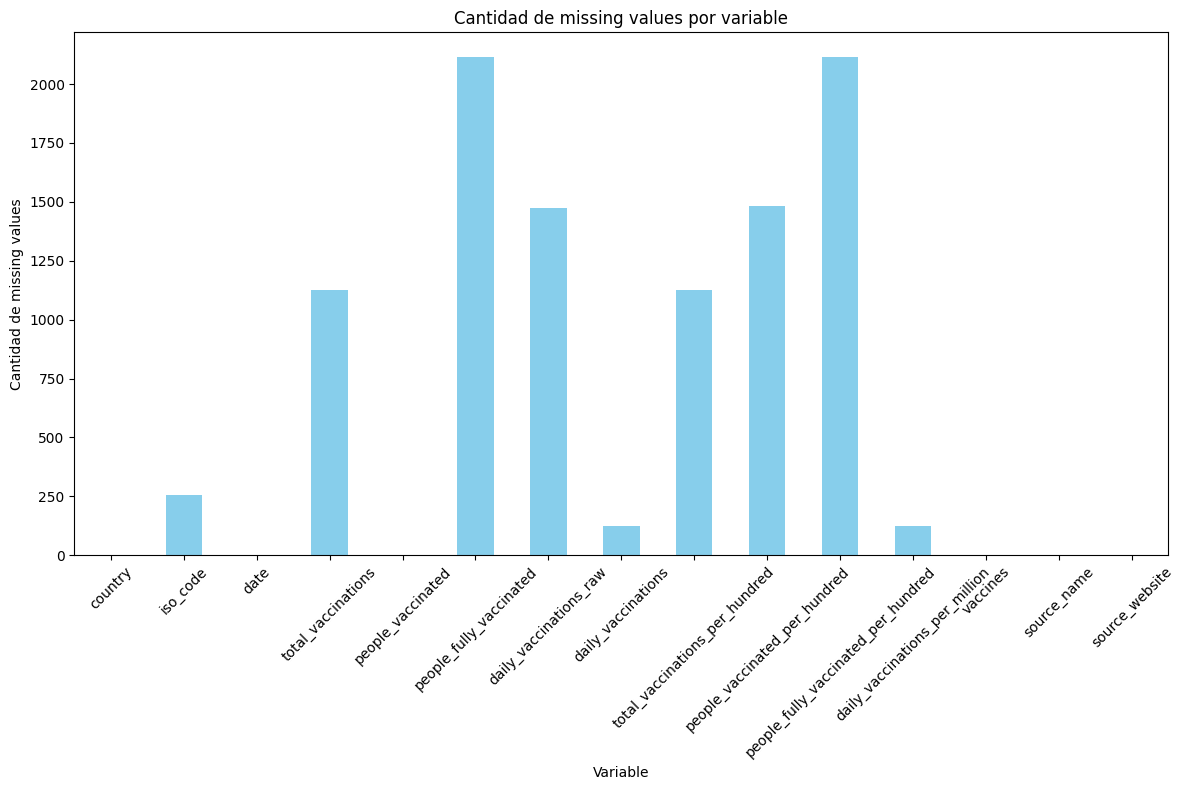

El total de missing values en people vaccinated es: 0


In [ ]:
# Calculamos la cantidad de valores faltantes en cada variable
missing_values_count = df.isnull().sum()

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
colors = ['skyblue'] * len(missing_values_count)
colors[4] = 'pink'
missing_values_count.plot(kind='bar', color=colors)
plt.title('Cantidad de missing values por variable')
plt.xlabel('Variable')
plt.ylabel('Cantidad de missing values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

missing_values_count = df['people_vaccinated'].isnull().sum()
print('El total de missing values en people vaccinated es:',missing_values_count)

En esta otra gráfica se ve que el código es correcto y ya no existen missing values en la columna deseada.

## 2. De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo (no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.

In [ ]:
# Agrupamos por país y contamos el número de días únicos
num_days_by_country = df.groupby('country')['date'].nunique()

# Ordenamos los países por el número de días y seleccionar los 5 primeros
top_5_countries = num_days_by_country.sort_values(ascending=False).head(5)
top_countries_names = top_5_countries.index.tolist()
print("Los 5 países que más días han administrado vacunas son:")
print(top_countries_names)

Los 5 países que más días han administrado vacunas son:
['Wales', 'England', 'Scotland', 'Northern Ireland', 'United Kingdom']


In [ ]:
# Filtramos los datos de los 5 países que están en top_countries_names
filtered_df = df[df['country'].isin(top_countries_names)]

# Seleccionamos solo las columnas 'date', 'country' y 'people' del DataFrame filtrado
filtered_df = filtered_df[['date', 'country', 'people_vaccinated']]
filtered_df

,date,country,people_vaccinated
880,2020-12-13,England,55389.000000
881,2020-12-14,England,27489.815082
882,2020-12-15,England,32202.260363
883,2020-12-16,England,38360.358482
884,2020-12-17,England,32684.144642
...,...,...,...
3203,2021-02-10,Wales,684097.000000
3204,2021-02-11,Wales,715944.000000
3205,2021-02-12,Wales,749445.000000
3206,2021-02-13,Wales,771651.000000


In [ ]:
# Calculamos el número de valores únicos en la variable 'country'
num_unique_countries = filtered_df['country'].unique()
print(num_unique_countries)

['England' 'Northern Ireland' 'Scotland' 'United Kingdom' 'Wales']


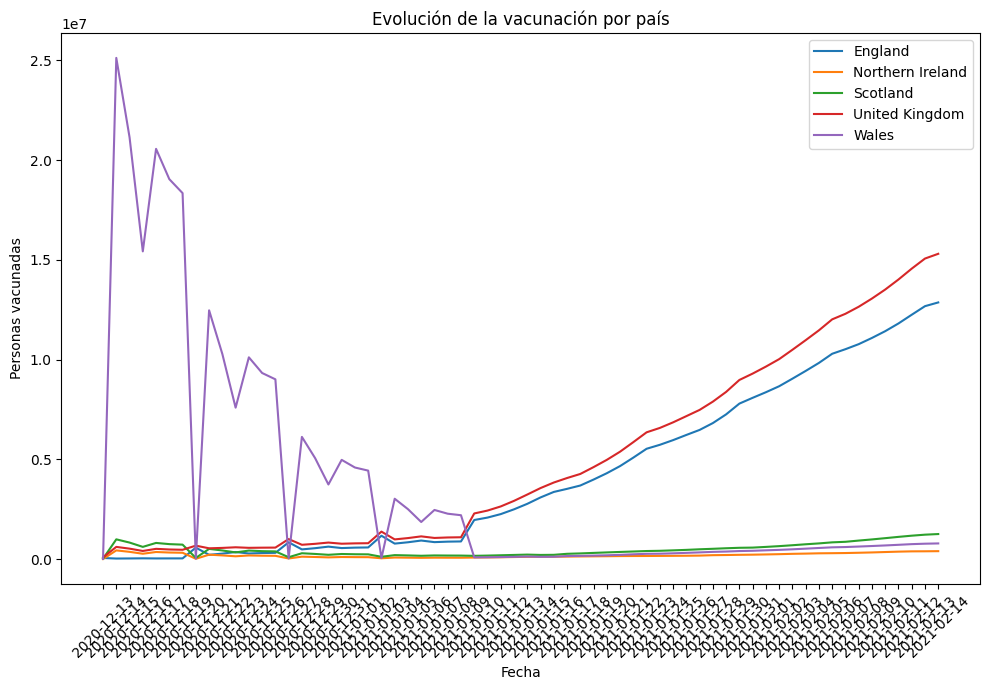

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))

# Iteramos sobre cada país en el DataFrame
for country in filtered_df['country'].unique():
    # Filtramos los datos para el país actual
    country_data = filtered_df[filtered_df['country'] == country]
    # Dibujamos el diagrama de líneas para el país actual
    plt.plot(country_data['date'], country_data['people_vaccinated'], label=country)

plt.title('Evolución de la vacunación por país')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Despues de haber observado y estudiado la base de datos **vacunation.csv** nos hemos dado cuenta de varias cosas y queremos dejarlas anotadas para hacer un buen estudio.


Nos gustaria empezar diferenciando un Pais de una Nacion:
1. *País:*

  Un país se refiere principalmente a una entidad geopolítica y geográfica. Es una región del mundo con límites geográficos definidos, ya sea por fronteras naturales (como ríos y montañas) o límites políticos establecidos por acuerdos entre naciones.
  Un país puede estar formado por una o más naciones, y puede incluir diversos grupos étnicos, culturas y comunidades.

2. *Nación:*

  La nación se refiere más a un grupo de personas que comparten características culturales, históricas, lingüísticas y, a menudo, étnicas. Es una comunidad identificada por lazos culturales y emocionales compartidos.
  No todos los países son naciones homogéneas. Algunos países pueden estar formados por diversas naciones, y a veces, una nación puede abarcar territorios en más de un país.

Habiendo hecho esta diferencia nos fiajamos en la variable *'Country'*, dentro de esta variable destacaremos las siguientes: Inglaterra, Escocia, Gales, Irlanda del Norte, Akrotiri y Dhekelia, Anguila, Bermudas, Territorio Antártico Británico, Islas Caimán, Islas Malvinas, Gibraltar, Montserrat, Pitcairn, Henderson, Ducie y Oeno, Santa Elena, Ascensión y Tristán de Acuña, Islas Turcas y Caicos, Islas Vírgenes Británicas, Islas Vírgenes de los Estados Unidos y Reino Unido

  Si clasificamos toda esta lista nos damos cuenta que Inglaterra, Escocia, Gales e Irlanda del Norte son las cuatro naciones que constituyen Reino Unido y luego  Akrotiri y Dhekelia, Anguila, Bermudas, Territorio Antártico Británico, Islas Caimán, Islas Malvinas, Gibraltar, Montserrat, Pitcairn, Henderson, Ducie y Oeno, Santa Elena, Ascensión y Tristán de Acuña, Islas Turcas y Caicos, Islas Vírgenes Británicas y Islas Vírgenes de los Estados Unidos son *territorios britanicos de ultramar*.

  Despues de haber clasificado, entendido y buscado estudios sobre Reino Unido, nos hemos fijado que generalmente se considera a Reino Unido como una entidad separada de sus territorios britanicos de ultramar por lo que tomaremos cada territorio britanico de ultramar de forma individual, en cuanto a las cuatro naciones que componen Reino Unido, la gran mayoria de estudios tienden a estudiar Reino Unido como conjunto por *lo que nosotros haremos lo mismo, combinaremos los datos de las cuatro naciones (Inglaterra, Escocia, Gales e Irlanda del Norte) junto con los datos de Reino Unido.* Esto nos dará una visión completa y agregada.

Veamos los países que contiene la variable "country".

In [ ]:
paises = df['country'].unique()
print(paises)

['Albania' 'Algeria' 'Andorra' 'Anguilla' 'Argentina' 'Austria'
 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belgium' 'Bermuda' 'Bolivia'
 'Brazil' 'Bulgaria' 'Cambodia' 'Canada' 'Cayman Islands' 'Chile' 'China'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Ecuador' 'Egypt'
 'England' 'Estonia' 'Faeroe Islands' 'Finland' 'France' 'Germany'
 'Gibraltar' 'Greece' 'Greenland' 'Guernsey' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Ireland' 'Isle of Man' 'Israel' 'Italy' 'Jersey'
 'Kuwait' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Maldives'
 'Malta' 'Mauritius' 'Mexico' 'Monaco' 'Morocco' 'Myanmar' 'Nepal'
 'Netherlands' 'Northern Cyprus' 'Northern Ireland' 'Norway' 'Oman'
 'Pakistan' 'Panama' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania' 'Russia'
 'Saint Helena' 'Saudi Arabia' 'Scotland' 'Serbia' 'Seychelles'
 'Singapore' 'Slovakia' 'Slovenia' 'Spain' 'Sri Lanka' 'Sweden'
 'Switzerland' 'Turkey' 'Turks and Caicos Islands' 'United Arab Emirates'
 'United Kingdom' 'United State

Naciones e islas de Reino Unido

In [ ]:
paises_interes = ['Anguilla','Bermuda','Gibraltar','Guernsey','Isle of Man', 'Northern Ireland', 'Saint Helena', 'Turks and Caicos Islands', 'England', 'United Kingdom','Wales']

In [ ]:
paises_interes = ['Anguilla', 'Bermuda', 'Gibraltar', 'Guernsey', 'Isle of Man', 'Northern Ireland', 'Saint Helena', 'Turks and Caicos Islands', 'England', 'Wales','Scotland']
# Filtramos el DataFrame excluyendo los países de interés
df = df[~df['country'].isin(paises_interes)]
# Ahora 'df' contendrá solo las filas que no corresponden a los países de interés

In [ ]:
# Agrupamos por país y contar el número de días únicos
num_days_by_country = df.groupby('country')['date'].nunique()
# Ordenamos los países por el número de días y seleccionar los 5 primeros
top_5_countries = num_days_by_country.sort_values(ascending=False).head(5)
top_countries_names = top_5_countries.index.tolist()
print("Los 5 países que más días han administrado vacunas son:")
print(top_countries_names)

Los 5 países que más días han administrado vacunas son:
['United Kingdom', 'Israel', 'Russia', 'China', 'United States']


In [ ]:
# Filtramos los datos de los 5 países que están en top_countries_names
filtered_df = df[df['country'].isin(top_countries_names)]
# Seleccionamos solo las columnas 'date', 'country' y 'people' del DataFrame filtrado
filtered_df = filtered_df[['date', 'country', 'people_vaccinated']]
filtered_df

,date,country,people_vaccinated
562,2020-12-15,China,1.931012e+06
563,2020-12-16,China,1.958662e+06
564,2020-12-17,China,1.994042e+06
565,2020-12-18,China,1.961239e+06
566,2020-12-19,China,1.971314e+06
...,...,...,...
3139,2021-02-10,United States,3.378338e+07
3140,2021-02-11,United States,3.472396e+07
3141,2021-02-12,United States,3.583486e+07
3142,2021-02-13,United States,3.705612e+07


In [ ]:
# Calculamos el número de valores únicos en la variable 'country'
num_unique_countries = filtered_df['country'].unique()
print(num_unique_countries)

['China' 'Israel' 'Russia' 'United Kingdom' 'United States']


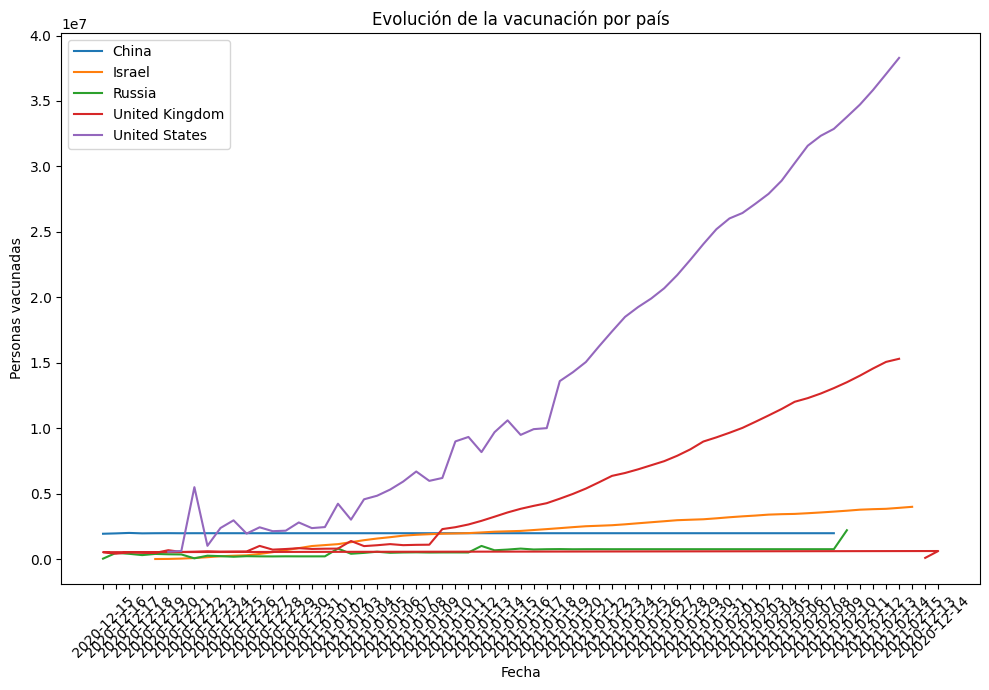

In [ ]:
import matplotlib.pyplot as plt
# Creamos una figura y ejes
plt.figure(figsize=(10, 7))

# Iteramos sobre cada país en el DataFrame
for country in filtered_df['country'].unique():
    # Filtramos los datos para el país actual
    country_data = filtered_df[filtered_df['country'] == country]
    # Dibujamos el diagrama de líneas para el país actual
    plt.plot(country_data['date'], country_data['people_vaccinated'], label=country)
# Añadimos título y etiquetas de los ejes
plt.title('Evolución de la vacunación por país')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')
plt.xticks(rotation=45)  # Rotamos las fechas en el eje x para mayor legibilidad
plt.legend()  # Añadi=mos leyenda con los nombres de los países
plt.tight_layout()  # Ajustamos el diseño para que no se superpongan los elementos
plt.show()

# **Práctica	2: Sensores	atmosféricos**

Se cuenta con los datos del año 2020 de distintas mediciones de un sensor medioambiental situado en el
campus de la Universidad Francisco de Vitoria. Para analizar la información recogida haremos uso de un
dataset proporcionado por la propia Universidad llamado “ozone”.

In [ ]:
import pandas as pd

# Cargamos el archivo CSV desde el entorno local de Colab
# Especificamos la coma como separador y omitir la primera fila
datos = pd.read_csv('ozone.csv', sep=',', header=None, skiprows=1)

# Especificamos los nombres de las columnas manualmente si es necesario
nombres_columnas = ['Month', 'Day_of_month', 'Day_of_week', 'ozone_reading', 'pressure_height', 'Wind_speed',
                    'Humidity', 'Temperature_Sandburg', 'Temperature_ElMonte', 'Inversion_base_height',
                    'Pressure_gradient', 'Inversion_temperature', 'Visibility']

# Asignamos los nombres de las columnas al DataFrame
datos.columns = nombres_columnas

# Mostramos las primeras filas del DataFrame
print(datos.head())

   Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
0      1             5            1           5.34             5760   
1      1             6            2           5.77             5720   
2      1             7            3           3.69             5790   
3      1             8            4           3.89             5790   
4      1             9            5           5.76             5700   

   Wind_speed  Humidity  Temperature_Sandburg  Temperature_ElMonte  \
0           3        51                    54                45.32   
1           4        69                    35                49.64   
2           6        19                    45                46.40   
3           3        25                    55                52.70   
4           3        73                    41                48.02   

   Inversion_base_height  Pressure_gradient  Inversion_temperature  Visibility  
0                   1450                 25                  57.02     

## 1.  Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading,Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos obtenidos en cada caso.

Para realizar un estudio de los outlayers  primero hay que definir qué son en el contexto del problema, en este caso se habla de Wind_speed, Ozone_reading y Visibility, que son las variables que se van a analizar. Para ello hay que ver el dominio de cada una, es decir, ver en qué rango se mueven normalmente los datos, esto se puede ver fácilmente en un gráfico del tipo boxplot donde podemos ver los valores máximos, valores mínimos, donde se concentran la mayoría de los datos y los outliers o datos fuera de rango.

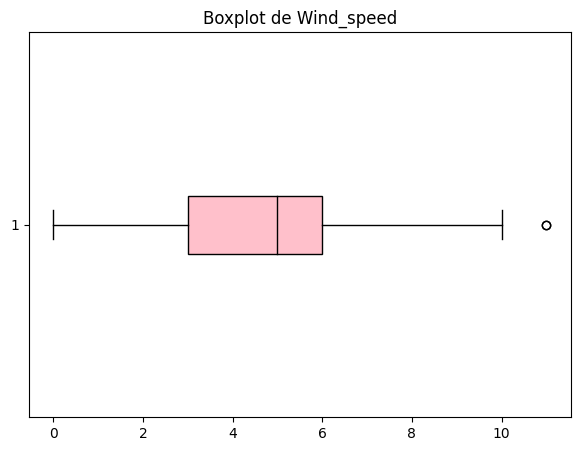

            Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
count  203.000000    203.000000   203.000000     203.000000       203.000000   
mean     6.522167     15.704433     3.004926      11.373990      5746.157635   
std      3.594998      8.569537     1.401899       8.192652       113.027705   
min      1.000000      1.000000     1.000000       0.720000      5320.000000   
25%      3.000000      9.000000     2.000000       4.770000      5690.000000   
50%      6.000000     15.000000     3.000000       8.900000      5760.000000   
75%     10.000000     23.000000     4.000000      16.075000      5830.000000   
max     12.000000     31.000000     5.000000      37.980000      5950.000000   

       Wind_speed    Humidity  Temperature_Sandburg  Temperature_ElMonte  \
count  203.000000  203.000000            203.000000           203.000000   
mean     4.866995   57.610837             61.113300            56.542956   
std      2.105402   20.847662             14.206468

In [ ]:
import matplotlib.pyplot as plt

# Extraemos los datos de wind speed del dataset.
variable = datos['Wind_speed']

# Creamos el boxplot
plt.figure(figsize=(7, 5))
box = plt.boxplot(variable, patch_artist=True,
                   boxprops=dict(facecolor='pink'),
                   medianprops=dict(color='black'),
                   vert=False)
plt.title('Boxplot de Wind_speed')
plt.show()

# Comprobación de outlayers
conteo_valores = (datos['Wind_speed'] > 8).sum()
summary=datos.describe()
print(summary)

print("Número de valores por encima de 8 en Wind_speed:", conteo_valores)


In [ ]:
import numpy as np
# Calculamos los outlayers de wind speed con IQR.

# Calculamos los cuartiles
q1 = np.percentile(variable, 25)
q3 = np.percentile(variable, 75)

# Calculamos el IQR
iqr = q3 - q1

# Calculamos los límites para identificar los valores atípicos
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Identificamos los valores atípicos
valores_atipicos = variable[(variable < limite_inferior) | (variable > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
22    11
36    11
Name: Wind_speed, dtype: int64


### Para Wind_speed

En el caso del wind speed la mayoría de los datos se mueven entre 3-6 km/h(suponemos esa medida que es la estándar) y vemos un outlier que supera los 10 km/h, teniendo en cuenta que entre 6 y 10 u 11 km/h no hay gran diferencia, estaría bien comprobar si estos tipos de datos son realmente outlayers. Haciendo un summary y teniendo en cuenta la desviación típica que es de 2.1 km/h lo "máximo" dentro de lo normal estaría entre los 3-8 km/h, tomando como 6 Km/h el valor más alto de la parte donde más se concentran los datos. Para determinar si esto es realmente un outlayer, se pueden contar cuántos datos de la base se encuentran por encima de este valor y así ver si son muy frecuentes o son atípicos.

El número de datos por encima de este valor son muy pocos comparado con el total de los datos que se tienen de cada columna, por tanto si que son atípicos y tienen que ser considerados fuera de rango.

Esta es una forma de hacerlo, pero tambien lo comprobaremos con el IQR.


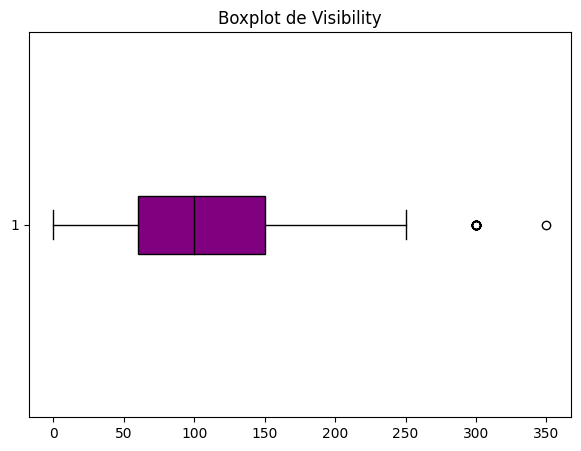

In [ ]:
# Extraemos la columna de interés del DataFrame
variable = datos['Visibility']

# Creamos el gráfico de cajas
plt.figure(figsize=(7, 5))
box = plt.boxplot(variable, patch_artist=True,
                   boxprops=dict(facecolor='purple'),
                   medianprops=dict(color='black'),
                   vert=False)
plt.title('Boxplot de Visibility')

# Mostramos el gráfico
plt.show()

### Para Visibility
En el caso de la visibilidad, investigando un poco los datos la medida de esta variable es en metros, aunque usualmente se suele medir en kilómetros, pero viendo lo elevados que son los valores diremos que se mide en metros, teniendo en cuenta esto, la visibilidad de esta zona es bastante baja.

Esto quiere decir que los outlayers que se ven portan de sentido.

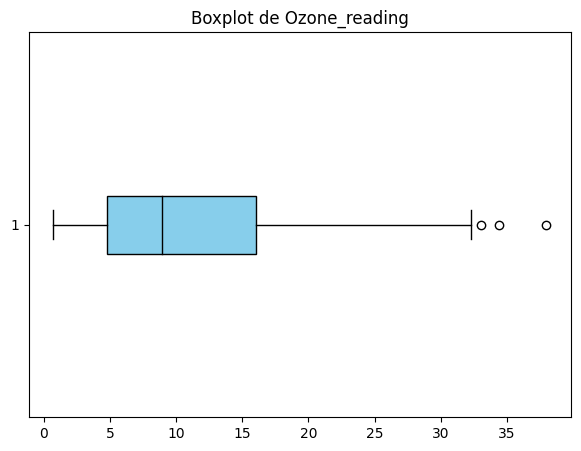

In [ ]:
import matplotlib.pyplot as plt


# Extraemos la columna de interés del DataFrame
variable = datos['ozone_reading']

# Creamos el gráfico de cajas
plt.figure(figsize=(7, 5))
box = plt.boxplot(variable, patch_artist=True,
                   boxprops=dict(facecolor='skyblue'),
                   medianprops=dict(color='black'),
                   vert=False)
plt.title('Boxplot de Ozone_reading')

# Mostramos el gráfico
plt.show()

### Para ozone reading
Observando los niveles de ozono se puede decir que los valores pertenecen a un lugar con poca contaminación, ya que la mayoría se concentran entre 5-15, por tanto también tienen sentido estos outlayers donde superan incluso los 30.

## 2. Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y “Visibility”.  

Primero se calcula la intersección de los datos, posteriormente calcularemos los outlayers con el IQR y se mostrarán los valores con un boxplot para comprobar si los outlayers son coherentes.

In [ ]:
Q1_wind = datos['Wind_speed'].quantile(0.25)
Q3_wind = datos['Wind_speed'].quantile(0.75)
IQR_wind = Q3_wind - Q1_wind

Q1_vis = datos['Visibility'].quantile(0.25)
Q3_vis = datos['Visibility'].quantile(0.75)
IQR_vis = Q3_vis - Q1_vis

# Calculamos los límites para identificar outliers
lower_bound_wind = Q1_wind - 1.5 * IQR_wind
upper_bound_wind = Q3_wind + 1.5 * IQR_wind

lower_bound_vis = Q1_vis - 1.5 * IQR_vis
upper_bound_vis = Q3_vis + 1.5 * IQR_vis

# Identificamos outliers para Wind_speed y Visibility
outliers_wind = datos[(datos['Wind_speed'] < lower_bound_wind) | (datos['Wind_speed'] > upper_bound_wind)]
outliers_vis = datos[(datos['Visibility'] < lower_bound_vis) | (datos['Visibility'] > upper_bound_vis)]

# Calculamos la intersección y unión de outliers
interseccion = outliers_wind.merge(outliers_vis, how='inner')
union = outliers_wind.merge(outliers_vis, how='outer')

# Imprimimos el resultados
print("Intersección de outliers entre Wind_speed y Visibility:\n", interseccion)
print("\nUnión de outliers entre Wind_speed y Visibility:\n", union)

Intersección de outliers entre Wind_speed y Visibility:
    Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
0      2             9            1           2.92             5490   

   Wind_speed  Humidity  Temperature_Sandburg  Temperature_ElMonte  \
0          11        72                    37                38.48   

   Inversion_base_height  Pressure_gradient  Inversion_temperature  Visibility  
0                   5000                 32                  38.12         350  

Unión de outliers entre Wind_speed y Visibility:
     Month  Day_of_month  Day_of_week  ozone_reading  pressure_height  \
0       2             9            1           2.92             5490   
1       3             3            3           2.79             5320   
2       2            10            2           4.08             5560   
3       2            12            4           8.32             5680   
4       2            20            5           5.73             5690   
5       2     

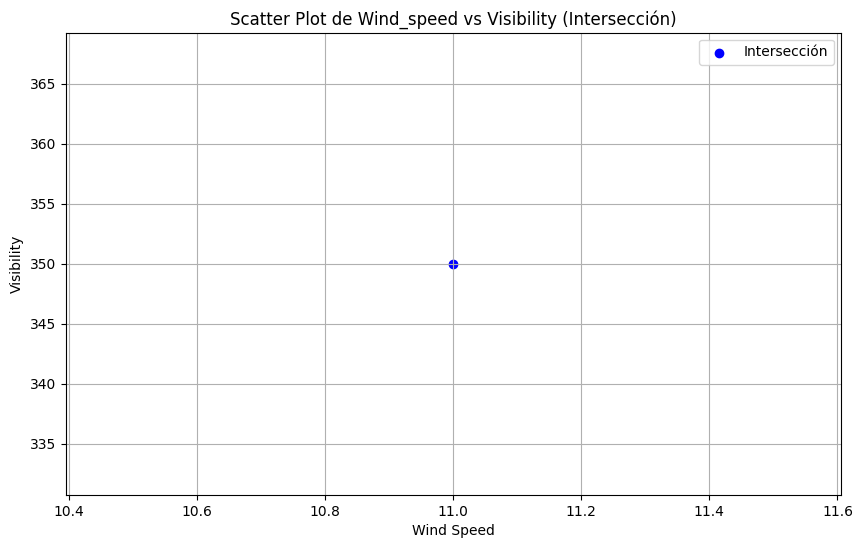

In [ ]:

import matplotlib.pyplot as plt
# Gráfica para la intersección: Scatter plot de 'Wind_speed' vs 'Visibility'
plt.figure(figsize=(10, 6))
plt.scatter(interseccion['Wind_speed'], interseccion['Visibility'], color='blue', label='Intersección')
plt.title('Scatter Plot de Wind_speed vs Visibility (Intersección)')
plt.xlabel('Wind Speed')
plt.ylabel('Visibility')
plt.legend()
plt.grid(True)
plt.show()

### Intersección de los outlayers

Teniendo en cuenta los datos de la intersección podemos decir varias cosas.


Al observar la intersección de outliers entre las variables "Wind_speed" y "Visibility", podemos notar que hay un conjunto de datos específicos que son considerados outliers en ambas variables. Esto sugiere que hay una relación entre la velocidad del viento y la visibilidad que puede ser atípica en comparación con el resto de los datos.

En la mayoría de las regiones de Españ, febrero corresponde al invierno, y es común que en esta temporada se experimenten condiciones de viento y frío. Por lo tanto, la presencia de viento y frío en febrero no es necesariamente inusual o atípica en sí misma.

Sin embargo, los valores extremos de velocidad del viento (viento de 11 mph y visibilidad de 350 millas) siguen siendo excepcionales, incluso en condiciones de invierno. Es poco probable que se produzcan vientos tan fuertes y una visibilidad tan clara simultáneamente en la mayoría de las situaciones.

Por lo tanto, aunque es razonable esperar viento y frío en febrero, pero los valores extremos son poco comunes y poco probables en la mayoría de los climas, incluyendo el mediterráneo continentalizado, por tanto podrían ser el resultado de errores de medición o registros incorrectos.


### Unión de los outlayers

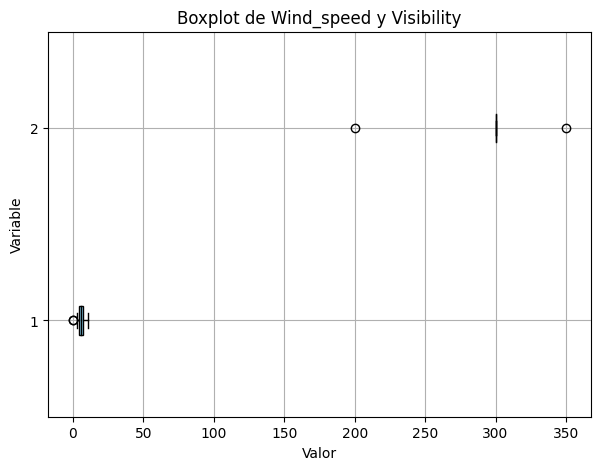

In [ ]:
import matplotlib.pyplot as plt
# Creamos un DataFrame solo con las columnas 'Wind_speed' y 'Visibility'
datos_wind_vis = union[['Wind_speed', 'Visibility']]

# Creamos el gráfico de cajas
plt.figure(figsize=(7, 5))
box = plt.boxplot(datos_wind_vis, patch_artist=True,
                   boxprops=dict(facecolor='skyblue'),
                   medianprops=dict(color='black'),
                   vert=False)
plt.title('Boxplot de Wind_speed y Visibility')
plt.xlabel('Valor')
plt.ylabel('Variable')
plt.grid(True)
plt.show()

Los datos de la unión muestran cierta variabilidad tanto en la velocidad del viento como en la visibilidad a lo largo del tiempo. Esto podría indicar que hay factores dinámicos en el ambiente que afectan estas medidas.

No hay una tendencia clara en la velocidad del viento o la visibilidad a lo largo del mes basándonos en los datos de la unión. Esto sugiere que no hay una tendencia temporal obvia o que el período de tiempo no es suficientemente largo para establecer una tendencia. Dado que estos datos son la unión de valores atípicos, cada punto representa un día en el que la velocidad del viento o la visibilidad (o ambos) fueron inusualmente altos o bajos. Sin embargo, no parece haber un patrón consistente que indique condiciones extremas recurrentes en días específicos.

No parece haber una correlación directa entre la velocidad del viento y la visibilidad en los datos presentados. Hay días con alta visibilidad y velocidad del viento baja y viceversa. Si estos puntos representan valores atípicos, podríamos investigar las causas de estos valores extremos. Podrían ser el resultado de eventos específicos (como condiciones climáticas extremas) o errores en la medición o el registro de datos.

Para aplicaciones prácticas como la planificación urbana, la agricultura o la gestión del tráfico aéreo, estos valores atípicos podrían ser de particular interés ya que las condiciones extremas de viento y visibilidad pueden tener implicaciones significativas en estas áreas.

## 3. Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan relacionar diferentes variables ¿Qué nos dicen los datos?


Realizamos un estudio de las variables con la matriz de correlación, que nos ayudará a ver mejor cómo están relacionadas, para posteriormente categorizarlas y representarlas.

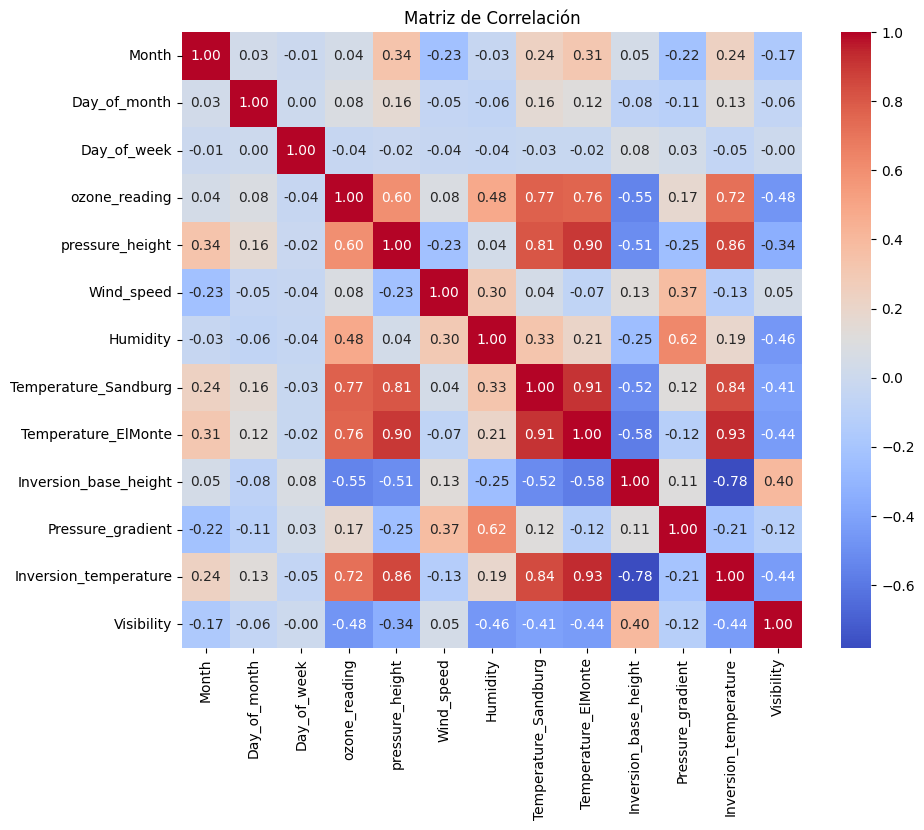

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculamos la matriz de correlación
correlacion = datos.corr()
# Creamos un mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación nos indica que tres variables tienen bastante relación entre ellas, estas son:

pressure_height, Temperature_El Monte y Inversion_Temperature

Categorizamos pressure_height que es la altura o altitud a la que se mide la presión atmosférica.

Se categoriza en "Bajo", "Alto" y "Medio" para que los resultados sean más fáciles de interpretar y comunicar.

Lo mismo con Inversion_Temperature y Temperature_ElMonte.

Relacionamos "pressure_height" con "Temperature_El Monte" y "inversion_temperature" con "Temperature_El Monte" ya que estamos interesados en explorar cómo la temperatura varía en relación con la altitud y la presencia de inversiones térmicas.

Categorizar las tres variables en "bajo", "medio" y "alto" proporciona una forma útil de resumir y analizar los datos, simplificando su interpretación y permitiendo la comparación entre diferentes niveles de cada variable.



## Pressure_height

Hallamos el máximo, mínimo, media y desviación de las variables para poder realizar los límites de los intervalos y asignar las categorías.

Así categorizamos las variables en intervalos 'Bajo', 'Medio' y 'Alto' basados en sus estadísticas descriptivas.


Primero haremos un gráfico de densidad, que nos ayudará a saber si la distribución de los datos es correcta.



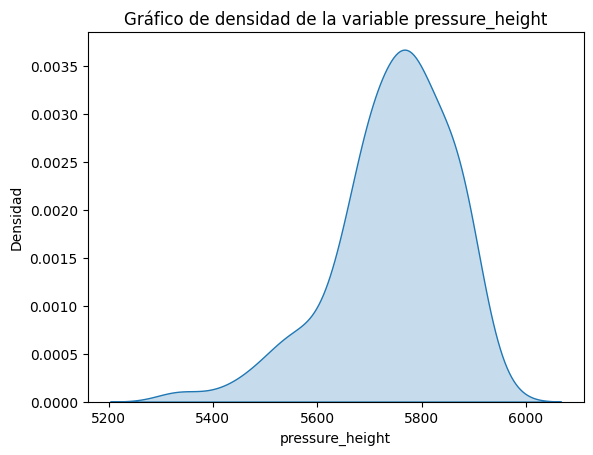

In [ ]:
import seaborn as sns

# Gráfico de densidad
sns.kdeplot(datos['pressure_height'], fill=True)
plt.xlabel('pressure_height')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad de la variable pressure_height')
plt.show()

In [ ]:
#máximo, mínimo, media y desviación
import numpy as np
valores_unicos = datos['pressure_height'].unique()
media_valores_unicos = valores_unicos.mean()
desviacion_tipica_valores_unicos = np.std(valores_unicos)

#mostramos resultados
print('Valor máximo:',max(valores_unicos))
print('Valor mínimo:',(min(valores_unicos)))
print('Desviación típica:',desviacion_tipica_valores_unicos)
print('Media:',media_valores_unicos)

Valor máximo: 5950
Valor mínimo: 5320
Desviación típica: 159.97707626580615
Media: 5681.041666666667


In [ ]:
#CREACIÓN DE LOS INTERVALOS

# Convertir los datos de 'Pressure_gradient' a tipo numérico
datos['pressure_height'] = datos['pressure_height'].astype(float)

# Calcular los límites de los intervalos
intervalo_bajo = np.min(valores_unicos) + desviacion_tipica_valores_unicos
intervalo_medio = media_valores_unicos + desviacion_tipica_valores_unicos
intervalo_alto = np.max(valores_unicos) - desviacion_tipica_valores_unicos

# Definir las categorías
categorias = ['Bajo', 'Medio', 'Alto']

# Clasificar los datos en función de los intervalos usando pd.cut()
datos['pressure_height'] = pd.cut(datos['pressure_height'], bins=[-np.inf, intervalo_bajo, intervalo_medio, np.inf], labels=categorias)
# Mostramos los resultados.
print(intervalo_bajo)
print(intervalo_medio)
print(intervalo_alto)

5479.977076265806
5841.018742932473
5790.022923734194


Una vez tenemos todas los intervalos y categorías vamos a graficarlo para que sea más visual.

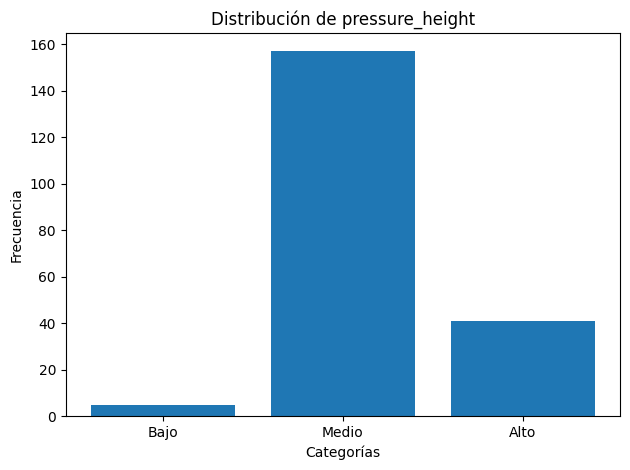

In [ ]:
import matplotlib.pyplot as plt

# Variable y título
variable = 'pressure_height'
titulo = 'Distribución de pressure_height'

# Contar los valores de cada categoría
conteo_categorias = datos[variable].value_counts()
# Reindexar para asegurar que todas las categorías aparezcan
conteo_categorias = conteo_categorias.reindex(['Bajo', 'Medio', 'Alto'], fill_value=0)
# Crear el gráfico de barras
plt.bar(conteo_categorias.index, conteo_categorias.values)
# Añadir título y etiquetas
plt.title(titulo)
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

### Temperature_El Monte

Realizamos los mismos pasos para las demas variables.

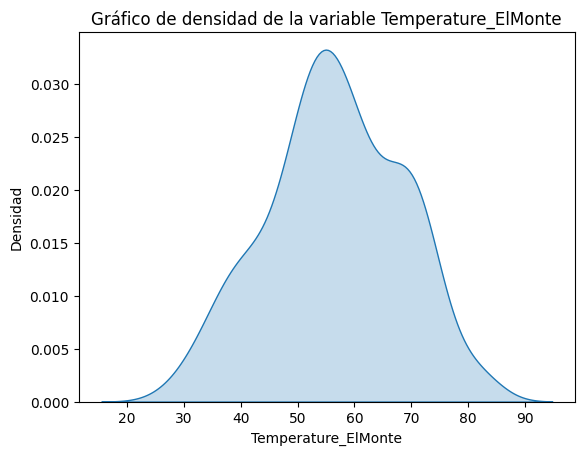

In [ ]:
import seaborn as sns
# Gráfico de densidad
sns.kdeplot(datos['Temperature_ElMonte'], fill=True)
plt.xlabel('Temperature_ElMonte')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad de la variable Temperature_ElMonte')
plt.show()

In [ ]:
# Máximo, mínimo, media y desviación.

import numpy as np
valores_unicos = datos['Temperature_ElMonte'].unique()
media_valores_unicos = valores_unicos.mean()
desviacion_tipica_valores_unicos = np.std(valores_unicos)

# Mostramos lo valores.
print('Valor máximo:',max(valores_unicos))
print('Valor mínimo:',(min(valores_unicos)))
print('Desviación típica:',desviacion_tipica_valores_unicos)
print('Media:',media_valores_unicos)

Valor máximo: 82.58
Valor mínimo: 27.68
Desviación típica: 12.649294893519274
Media: 55.32773722627737


In [ ]:
#CREACIÓN DE LOS INTERVALOS

# Convertir los datos en la columna 'Pressure_gradient' a tipo numérico
datos['Temperature_ElMonte'] = datos['Temperature_ElMonte'].astype(float)

# Calcular los límites de los intervalos
intervalo_bajo = np.min(valores_unicos) + desviacion_tipica_valores_unicos
intervalo_medio = media_valores_unicos + desviacion_tipica_valores_unicos
intervalo_alto = np.max(valores_unicos) - desviacion_tipica_valores_unicos

# Definir las categorías
categorias = ['Bajo', 'Medio', 'Alto']

# Clasificar los datos en función de los intervalos usando pd.cut()
datos['Temperature_ElMonte'] = pd.cut(datos['Temperature_ElMonte'], bins=[-np.inf, intervalo_bajo, intervalo_medio, np.inf], labels=categorias)

# Mostramos los valores
print(intervalo_bajo)
print(intervalo_medio)
print(intervalo_alto)

40.329294893519275
67.97703211979665
69.93070510648073


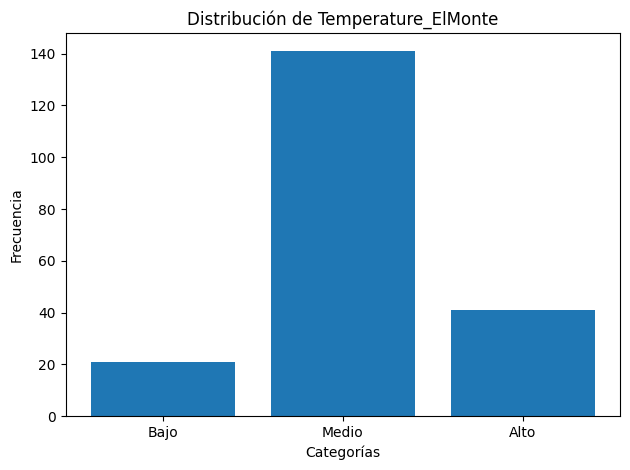

In [ ]:
import matplotlib.pyplot as plt

variable = 'Temperature_ElMonte'
titulo = 'Distribución de Temperature_ElMonte'

# Contar los valores de cada categoría
conteo_categorias = datos[variable].value_counts()

# Reindexar para asegurar que todas las categorías aparezcan
conteo_categorias = conteo_categorias.reindex(['Bajo', 'Medio', 'Alto'], fill_value=0)

# Crear el gráfico de barras
plt.bar(conteo_categorias.index, conteo_categorias.values)
plt.title(titulo)
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### inversion_temperature

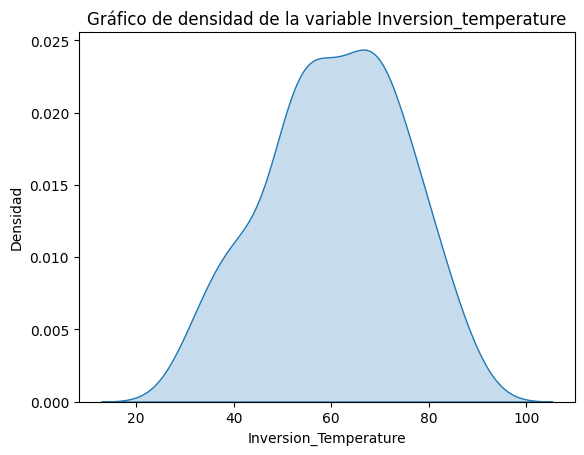

In [ ]:
import seaborn as sns
# Crear gráfico de densidad
sns.kdeplot(datos['Inversion_temperature'], fill=True)
# Etiquetas y título
plt.xlabel('Inversion_Temperature')
plt.ylabel('Densidad')
plt.title('Gráfico de densidad de la variable Inversion_temperature')
# Mostrar el gráfico de densidad
plt.show()

In [ ]:
# Máximo, mínimo, media y desviación.

import numpy as np
valores_unicos = datos['Inversion_temperature'].unique()
media_valores_unicos = valores_unicos.mean()
desviacion_tipica_valores_unicos = np.std(valores_unicos)

# Mostramos lo valores.
print('Valor máximo:',max(valores_unicos))
print('Valor mínimo:',(min(valores_unicos)))
print('Desviación típica:',desviacion_tipica_valores_unicos)
print('Media:',media_valores_unicos)

Valor máximo: 90.68
Valor mínimo: 27.5
Desviación típica: 15.138633871988153
Media: 60.36427586206898


In [ ]:
#CREACIÓN DE LOS INTERVALOS

# Convertir los datos en la columna 'Pressure_gradient' a tipo numérico
datos['Inversion_temperature'] = datos['Inversion_temperature'].astype(float)

# Calcular los límites de los intervalos
intervalo_bajo = np.min(valores_unicos) + desviacion_tipica_valores_unicos
intervalo_medio = media_valores_unicos + desviacion_tipica_valores_unicos
intervalo_alto = np.max(valores_unicos) - desviacion_tipica_valores_unicos

# Definir las categorías
categorias = ['Bajo', 'Medio', 'Alto']

# Clasificar los datos en función de los intervalos usando pd.cut()
datos['Inversion_temperature'] = pd.cut(datos['Inversion_temperature'], bins=[-np.inf, intervalo_bajo, intervalo_medio, np.inf], labels=categorias)

# Mostramos los valores
print(intervalo_bajo)
print(intervalo_medio)
print(intervalo_alto)

42.638633871988155
75.50290973405713
75.54136612801186


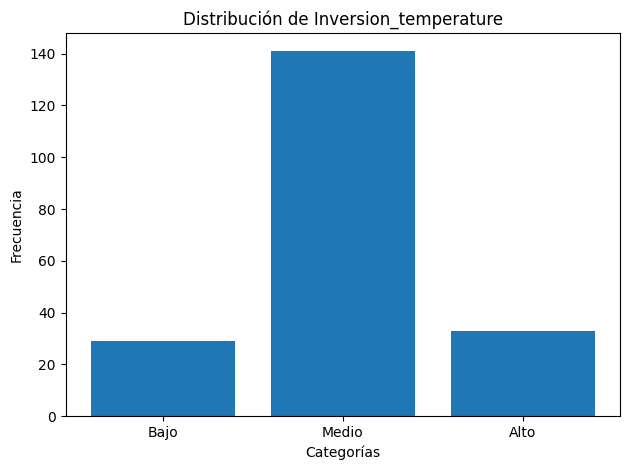

In [ ]:
import matplotlib.pyplot as plt

variable = 'Inversion_temperature'
titulo = 'Distribución de Inversion_temperature'

# Contar los valores de cada categoría
conteo_categorias = datos[variable].value_counts()

# Reindexar para asegurar que todas las categorías aparezcan
conteo_categorias = conteo_categorias.reindex(['Bajo', 'Medio', 'Alto'], fill_value=0)

# Crear el gráfico de barras
plt.bar(conteo_categorias.index, conteo_categorias.values)
plt.title(titulo)
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Graficamos las 3 variables juntas, para ver como se distribuyen y relacionan.

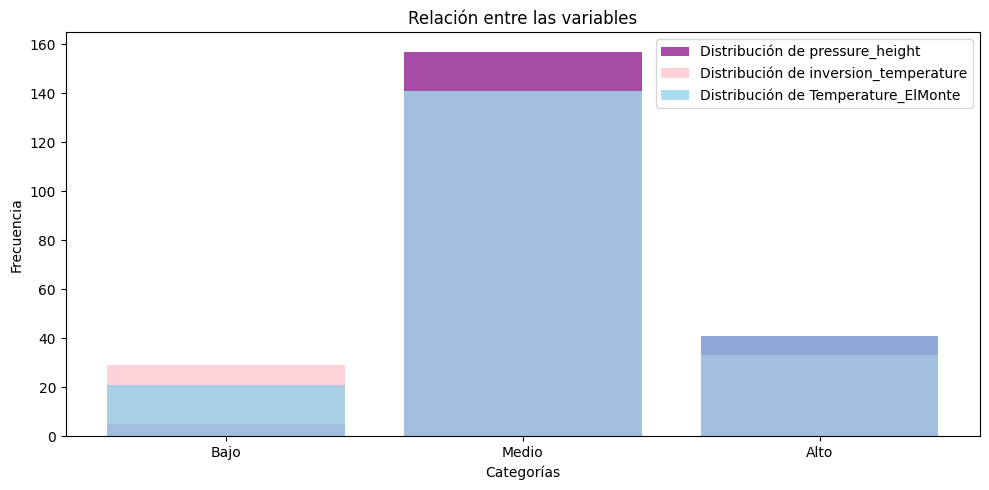

In [ ]:
import matplotlib.pyplot as plt

# Variables y títulos
variables = ['pressure_height', 'Inversion_temperature', 'Temperature_ElMonte']
titulos = ['Distribución de pressure_height', 'Distribución de inversion_temperature', 'Distribución de Temperature_ElMonte']

# Colores personalizados
colores = ['purple', 'pink', 'skyblue']

# Crear una nueva figura y subgráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Iterar sobre cada variable
for i, variable in enumerate(variables):
    # Contar los valores de cada categoría
    conteo_categorias = datos[variable].value_counts()
    # Reindexar para asegurar que todas las categorías aparezcan
    conteo_categorias = conteo_categorias.reindex(['Bajo', 'Medio', 'Alto'], fill_value=0)
    # Crear el gráfico de barras apiladas con colores personalizados
    ax.bar(conteo_categorias.index, conteo_categorias.values, label=titulos[i], alpha=0.7, color=colores[i])

# Añadir título y etiquetas
ax.set_title('Relación entre las variables')
ax.set_xlabel('Categorías')
ax.set_ylabel('Frecuencia')
ax.legend()

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

La gráfica compara la frecuencia de tres variables diferentes categorizadas en tres niveles: bajo, medio y alto.

En la categoría "Bajo", la frecuencia de las tres variables es relativamente baja y la temperatura de El Monte parece ser la contribución más pequeña. En la categoría "Medio", hay un pico significativo en la frecuencia, especialmente para la variable de presión_altura, que domina claramente en esta categoría. La categoría "Alto" muestra una frecuencia mucho más baja en comparación con la categoría "Medio", siendo la temperatura de El Monte la única variable presente.

La escala de frecuencia en el eje Y va de 0 a más de 150, y se puede observar que la categoría "Medio" supera este valor para la presión_altura. Esto puede indicar que las condiciones de presión_altura "Medio" son las más comunes para el conjunto de datos en cuestión.

Encontramos variables con correlaciones altas, como "pressure_height" con "Temperature_ElMonte", y estas muestran patrones similares en el gráfico de barras (por ejemplo, ambos tienen frecuencias altas en la categoría "Medio"), podemos inferir que hay una relación significativa entre ellas en el contexto climático de Pozuelo de Alarcón.

Es importante notar que la correlación no implica causalidad. Una alta correlación entre dos variables no significa necesariamente que una cause la otra; puede haber factores no incluidos en el análisis que influyen en ambas variables.

## 4. Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.

El objetico de este ejercicio es la medición de componentes medioambientales gracias a la información que hemos recogido de los sensores, por lo que nos contraremos en dichas variables.

In [ ]:
# Imprimir las columnas disponibles en el DataFrame 'datos'
columnas=datos.columns
print(columnas)

Index(['Month', 'Day_of_month', 'Day_of_week', 'ozone_reading',
       'pressure_height', 'Wind_speed', 'Humidity', 'Temperature_Sandburg',
       'Temperature_ElMonte', 'Inversion_base_height', 'Pressure_gradient',
       'Inversion_temperature', 'Visibility', 'date'],
      dtype='object')


Nos centramos en las variables categorizadas ya que consideramos que son las más importantes de la base de datos ya que muestran bastante relación entre sí.

Para ello queremos realizar una tabla con la frecuencia con la que aparecen Alto,Medio y Bajo, en las tres variables durante los días del mes.

In [ ]:
conteo_categorias_Alto = datos.groupby('Day_of_month').agg({
    'Inversion_temperature': lambda x: (x == 'Alto').sum(),
    'Temperature_ElMonte': lambda x: (x == 'Alto').sum(),
    'pressure_height': lambda x: (x == 'Alto').sum()
})

conteo_categorias_Bajo = datos.groupby('Day_of_month').agg({
    'Inversion_temperature': lambda x: (x == 'Bajo').sum(),
    'Temperature_ElMonte': lambda x: (x == 'Bajo').sum(),
    'pressure_height': lambda x: (x == 'Bajo').sum()
})

conteo_categorias_Medio = datos.groupby('Day_of_month').agg({
    'Inversion_temperature': lambda x: (x == 'Medio').sum(),
    'Temperature_ElMonte': lambda x: (x == 'Medio').sum(),
    'pressure_height': lambda x: (x == 'Medio').sum()
})

# Renombrar columnas para cada DataFrame
conteo_categorias_Alto = conteo_categorias_Alto.rename(columns={'Inversion_temperature': 'Count_Inversion_temperature_Alto',
                                                              'Temperature_ElMonte': 'Count_Temperature_ElMonte_Alto',
                                                              'pressure_height': 'Count_pressure_height_Alto'})

conteo_categorias_Bajo = conteo_categorias_Bajo.rename(columns={'Inversion_temperature': 'Count_Inversion_temperature_Bajo',
                                                              'Temperature_ElMonte': 'Count_Temperature_ElMonte_Bajo',
                                                              'pressure_height': 'Count_pressure_height_Bajo'})

conteo_categorias_Medio = conteo_categorias_Medio.rename(columns={'Inversion_temperature': 'Count_Inversion_temperature_Medio',
                                                              'Temperature_ElMonte': 'Count_Temperature_ElMonte_Medio',
                                                              'pressure_height': 'Count_pressure_height_Medio'})

# Unir los DataFrames
conteo_categorias = conteo_categorias_Alto.join([conteo_categorias_Bajo, conteo_categorias_Medio])


Comprobemos que se nos han guardado bien todas las nuevas variables en "conteo_categorias".

In [ ]:
columnas2=conteo_categorias.columns
print(columnas2)

Index(['Count_Inversion_temperature_Alto', 'Count_Temperature_ElMonte_Alto',
       'Count_pressure_height_Alto', 'Count_Inversion_temperature_Bajo',
       'Count_Temperature_ElMonte_Bajo', 'Count_pressure_height_Bajo',
       'Count_Inversion_temperature_Medio', 'Count_Temperature_ElMonte_Medio',
       'Count_pressure_height_Medio'],
      dtype='object')


Efectivamente aparecen 9 nuevas variables ya que hemos separado pressure_height, inversion_temperature y temperature_ElMonte en tres casos cada una (Alto,Medio,Bajo) , guardando la frecuencia con la que aparecen durante los días del mes (Day_of_Month).

Ahora graficaremos estas 9 variables respecto a los días del mes para ver como se comportan.

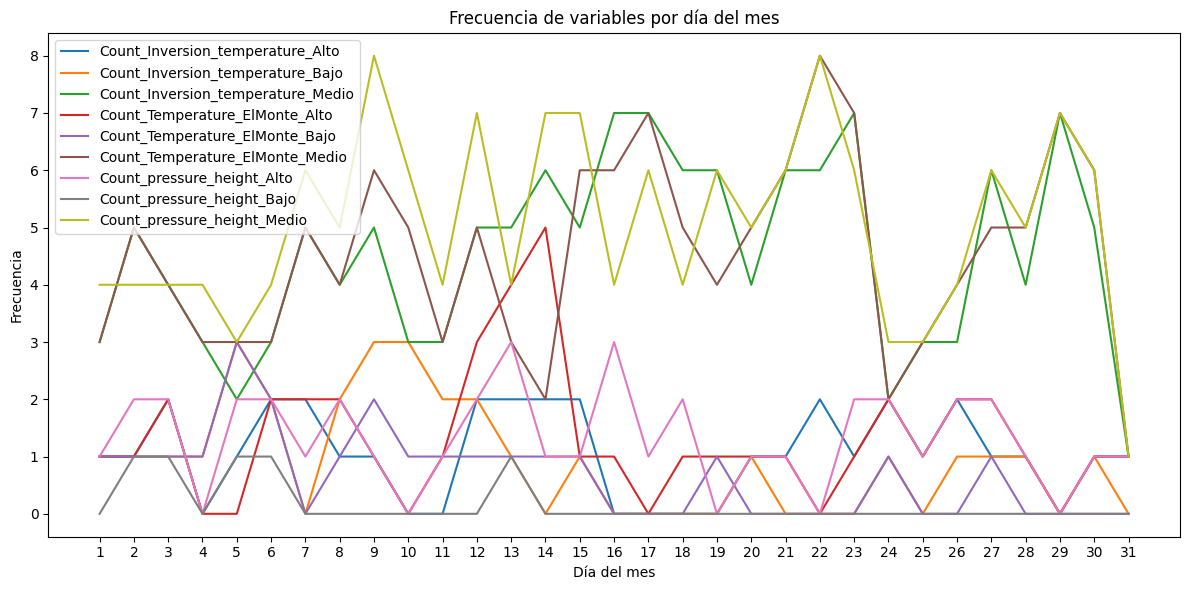

In [ ]:
import matplotlib.pyplot as plt

# Crear un rango de días del mes completo
dias_del_mes_completo = range(1, 32)

# Fusionar con los datos
conteo_categorias_completo = conteo_categorias.reindex(dias_del_mes_completo, fill_value=0)

# Obtener las variables y sus frecuencias para cada día del mes
variables = ['Count_Inversion_temperature', 'Count_Temperature_ElMonte', 'Count_pressure_height']
frecuencias_por_variable = {variable: conteo_categorias_completo[[f'{variable}_{categoria}' for categoria in ['Alto', 'Bajo', 'Medio']]] for variable in variables}

# Graficar las variables
plt.figure(figsize=(12, 6))
for variable in variables:
    for categoria in ['Alto', 'Bajo', 'Medio']:
        columna = f'{variable}_{categoria}'
        plt.plot(dias_del_mes_completo, frecuencias_por_variable[variable][columna], label=columna)

plt.xlabel('Día del mes')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de variables por día del mes')
plt.legend()
plt.grid(False)  # Desactivar los cuadros de fondo
plt.xticks(range(1, 32))
plt.tight_layout()
plt.show()


# **Práctica 3:	Reducción de la dimensionalidad**

Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varias
dimensiones para ello. Para evitar esto, existe una metodología en la cual, un set de datos multidimensional,
podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha
metodología se conoce con el nombre de Principal Component Analysis (PCA). Vamos a aplicarlo a un set de
datos que está colgado en Canvas llamado USA.xlsx y vamos a dar una serie de explicaciones de que ocurre.

## 1. Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de la librería scikit-learn.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargamos el conjunto de datos desde el archivo USA.xlsx
datos_usa = pd.read_excel('USA.xlsx')

# Seleccionamos solo las columnas numéricas (si es necesario)
datos_numericos = datos_usa.select_dtypes(include=['float64', 'int64'])

# Estandarizamos los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos_numericos)

# Creamos un DataFrame con los datos estandarizados
datos_estandarizados_df = pd.DataFrame(datos_estandarizados, columns=datos_numericos.columns)

# Mostramos las primeras filas del DataFrame estandarizado
print(datos_estandarizados_df.head())


        SO2  Neg.Temp  Empresas  Poblacion    Viento    Precip      Dias
0 -0.864758  2.036213 -0.449363  -0.046520 -2.440555 -2.556012 -2.975514
1 -0.735360  0.733515 -0.668567  -0.833224 -0.881504  1.010653 -0.531009
2 -0.778493  0.131192 -0.018143   0.187743 -0.527174 -1.385471 -1.791457
3 -0.562829 -0.541168 -0.016346  -0.163651 -0.314576 -2.048577 -1.065744
4  1.119347 -0.933378 -0.091810  -0.787770 -0.314576  0.567723  0.500266


## 2.- (1 punto) El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para representar los datos iniciales. Para ello, en primer lugar, habrá que obtener la matriz de covarianza mediante el método cov de Numpy y después aplicarle a dicha matriz el método linalg.eig también de NumPy. Obtén un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica qué quieren decir estos datos. ¿Cuánta información perdemos con 2 componentes? ¿Cuánta información representamos con 3 componentes?

In [ ]:
import numpy as np
import pandas as pd

# Calculamos la matriz de covarianza
cov_matrix = np.cov(datos_estandarizados, rowvar=False)

# Calculamos los autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Organizamos los autovalores y autovectores de mayor a menor
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calculamos el porcentaje de varianza y acumulado por cada componente
varianza_explicada_ratio = eigenvalues / np.sum(eigenvalues)
varianza_acumulada = np.cumsum(varianza_explicada_ratio)

# Creamos un DataFrame con los resultados
resultados_pca = pd.DataFrame({
    'Componente': range(1, len(varianza_explicada_ratio) + 1),
    'Autovalor': eigenvalues,
    'Porcentaje de Varianza Explicada': varianza_explicada_ratio,
    'Varianza Acumulada': varianza_acumulada
})

# Mostrar el DataFrame con los resultados
print(resultados_pca)

# Identificar el número de componentes para alcanzar al menos el 80% de varianza acumulada
umbral_varianza = 0.8
num_componentes_umbral = np.argmax(varianza_acumulada >= umbral_varianza) + 1
print(f'\nNúmero de componentes para alcanzar el {umbral_varianza * 100}% de varianza acumulada: {num_componentes_umbral}')

# Obtener las cargas de cada variable en cada componente principal
cargas_componentes = pd.DataFrame(eigenvectors[:, :num_componentes_umbral], columns=[f'Componente {i+1}' for i in range(num_componentes_umbral)], index=datos_estandarizados_df.columns)

# Mostrar las cargas de variables en cada componente principal
print('\nCargas de variables en cada componente principal:')
print(cargas_componentes)

   Componente  Autovalor  Porcentaje de Varianza Explicada  Varianza Acumulada
0           1   2.796323                          0.389731            0.389731
1           2   1.550143                          0.216048            0.605779
2           3   1.429847                          0.199282            0.805061
3           4   0.914291                          0.127427            0.932488
4           5   0.355448                          0.049540            0.982028
5           6   0.102795                          0.014327            0.996355
6           7   0.026153                          0.003645            1.000000

Número de componentes para alcanzar el 80.0% de varianza acumulada: 3

Cargas de variables en cada componente principal:
           Componente 1  Componente 2  Componente 3
SO2            0.489699      0.084576     -0.014350
Neg.Temp      -0.315371     -0.088638     -0.677136
Empresas       0.541169     -0.225881     -0.267159
Poblacion      0.487588     -0.282004 

Para responder a esta pregunta comenzaremos definiendo que son los Autovalores(Eigenvalues) y Autovectores(Eigenvectors):


*   Autovalores (Eigenvalues): Representan la cantidad de varianza explicada por cada componente principal. Mayor autovalor significa que ese componente explica más variabilidad en los datos originales.
*   Autovectores (Eigenvectors): Son los vectores propios asociados a cada autovalor y definen la dirección de cada componente principal.

El porcentaje de varianza explicada por cada componente se encuentra en la columna "Porcentaje de Varianza Explicada". En este caso se nos pregunta acerca de cuanta informacion se pierde con 2 componentes, si nos fiajamos en la tabla que hemos proporcionado con 2 componentes se explica aproximadamente el 39.34% de la varianza total. Por lo tanto, se pierde el 100% - 39.34% = 60.66% de la información original.

Si intentamos ver cuanto informacion podemos representar con 3 variables no damos cuenta que se puede lograr explicar aproximadamente 40.77% de la varianza acumulada, eso significa que se respresenta un 40.77% de la informacion original, podemos ver que al agregar una componente mas retenemos una proporcion mas sustancial de la informacion original en comparacion con coger una o dos componentes.

## 3.- (1 punto) Por último queremos representar gráficamente las ciudades de nuestro dataset, pero usandolos valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 3 dimensiones y comenta qué has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria. Habrá que interpretar qué información proporciona el eje X, Y y el Z. Por último, elegir al menos 4 ciudades de forma aleatoria y explicar qué pasa con ellas.

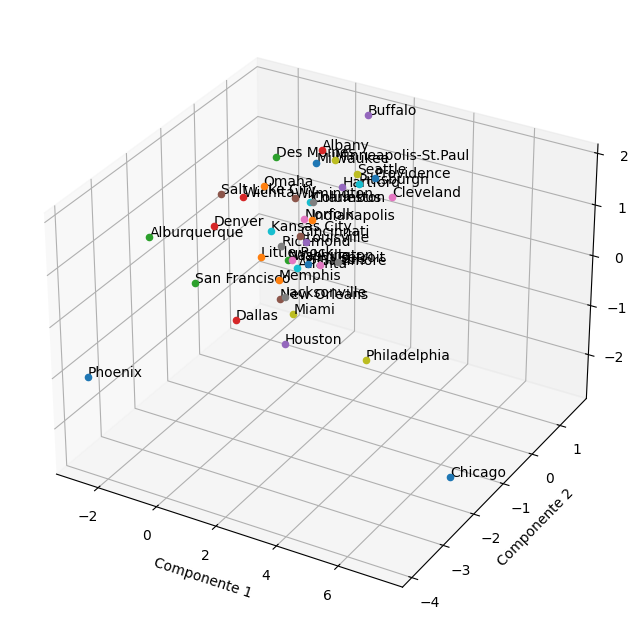

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seleccionamos las primeras 3 componentes principales
componentes_principales = eigenvectors[:, :3]

# Proyectamos los datos estandarizados sobre las primeras 3 componentes principales
datos_proyectados = np.dot(datos_estandarizados, componentes_principales)

# Creamos un DataFrame con los datos proyectados y los nombres de las ciudades
datos_proyectados_df = pd.DataFrame(datos_proyectados, columns=['Componente 1', 'Componente 2', 'Componente 3'])
datos_proyectados_df['Ciudad'] = datos_usa['Ciudad']  # Asegúrate de tener una columna 'Ciudad' en tu DataFrame original

# Creamos un diagrama de dispersión 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot con etiquetas
for i, row in datos_proyectados_df.iterrows():
    ax.scatter(row['Componente 1'], row['Componente 2'], row['Componente 3'])
    ax.text(row['Componente 1'], row['Componente 2'], row['Componente 3'], row['Ciudad'])

# Etiquetamos los ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Mostramos el diagrama
plt.show()


Las ciudades están dispersas a lo largo de los ejes, lo que indica una variación en las características que cada componente representa. Por ejemplo:

Componente 1: Hay una variación significativa, con ciudades como Chicago y Phoenix en los extremos opuestos.

Componente 2: La mayoría de las ciudades están agrupadas cerca del origen, pero con algunas excepciones como Buffalo.

Componente 3: La mayoría de las ciudades se encuentran en valores positivos, con algunas como Philadelphia y Houston en el extremo negativo.

La densidad de puntos en el centro podría indicar que muchas ciudades comparten características similares según las métricas evaluadas por las componentes. Las ciudades que están más alejadas de este centro podrían tener características únicas o distintas en uno o más aspectos.

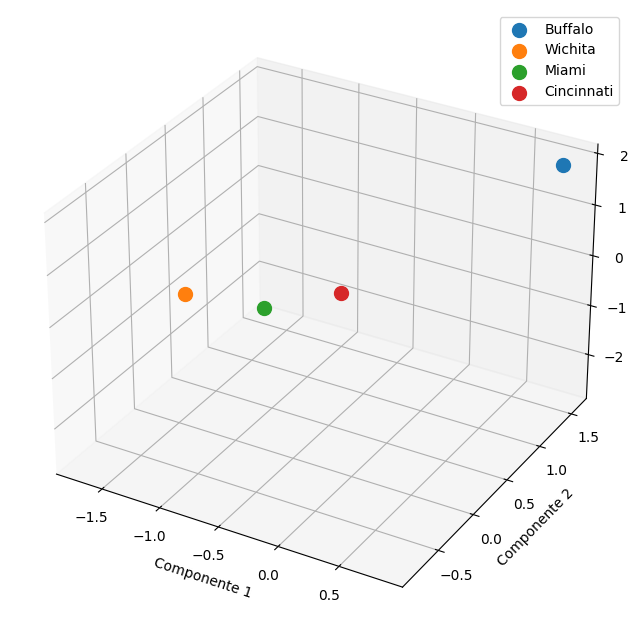

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar 4 ciudades de forma aleatoria
ciudades_aleatorias = datos_proyectados_df.sample(4, random_state=42)

# Crear un gráfico de dispersión 3D solo con los puntos de las ciudades aleatorias
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot con etiquetas para las ciudades aleatorias
for _, ciudad in ciudades_aleatorias.iterrows():
    ax.scatter(ciudad['Componente 1'], ciudad['Componente 2'], ciudad['Componente 3'], s=100, label=ciudad['Ciudad'])

# Etiquetar ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Mostrar el gráfico
plt.legend()
plt.show()

Analizando la ciudad de Miami, representada por el punto verde, se sitúa cerca del origen en la primera y segunda componente y negativamente en la tercera, lo que indica valores bajos en las primeras dos dimensiones y un valor negativo en la tercera. Esto podría interpretarse, según el contexto proporcionado, como una baja actividad empresarial y demográfica, alta precipitación y temperaturas negativas con ráfagas de viento elevadas.

Wichita, indicada por el punto naranja, muestra una posición similar a Miami en las dos primeras componentes, pero más cercana al origen en la tercera, sugiriendo también baja actividad empresarial y demográfica, altas precipitaciones, pero con temperaturas y vientos más moderados.

Cincinnati, marcado con el punto rojo, parece tener una posición intermedia en las dos primeras componentes y negativa en la tercera, lo que podría significar una actividad empresarial y demográfica no tan baja como las anteriores, precipitaciones no muy altas y condiciones de temperaturas y viento similares a Wichita.

Finalmente, Buffalo, señalado con el punto azul, está significativamente alejado en la primera componente, lo que podría indicar una mayor actividad empresarial y demográfica. En cuanto a la segunda componente, está alrededor del origen, lo que sugiere precipitaciones moderadas, y en la tercera componente, se muestra muy positivo, lo que podría interpretarse como temperaturas más elevadas y viento más suave en comparación con las otras ciudades.

## 4.- (1 punto) Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara los resultados y coméntalos.

   Componente  Autovalor  Porcentaje de Varianza Explicada  Varianza Acumulada
0           1   2.796323                          0.389731            0.389731
1           2   1.550143                          0.216048            0.605779
2           3   1.429847                          0.199282            0.805061
3           4   0.914291                          0.127427            0.932488
4           5   0.355448                          0.049540            0.982028
5           6   0.102795                          0.014327            0.996355
6           7   0.026153                          0.003645            1.000000

Número de componentes para alcanzar el 80.0% de varianza acumulada: 3

Cargas de variables en cada componente principal (scikit-learn):
           Componente 1  Componente 2  Componente 3
SO2            0.489699     -0.084576      0.014350
Neg.Temp      -0.315371      0.088638      0.677136
Empresas       0.541169      0.225881      0.267159
Poblacion      0.487588

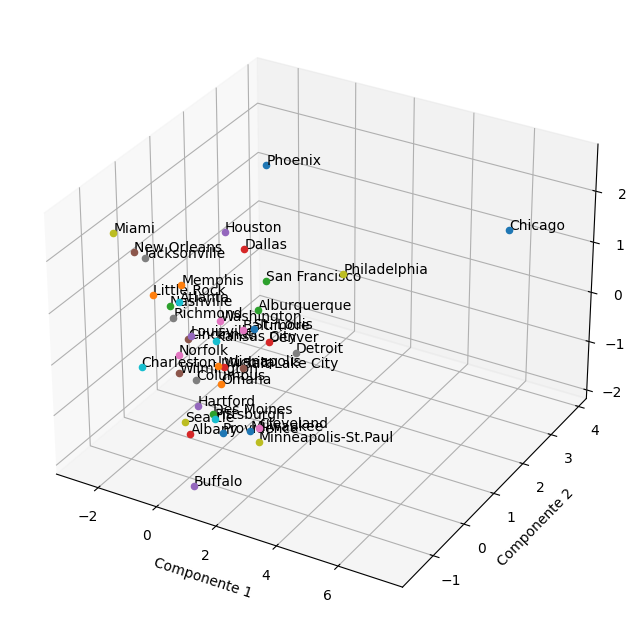

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cargar datos estandarizados desde el DataFrame previo
datos_estandarizados = datos_estandarizados_df.values

# Inicializar y ajustar el modelo PCA con scikit-learn
pca = PCA()
datos_proyectados_sklearn = pca.fit_transform(datos_estandarizados)

# Obtener el porcentaje de varianza explicada y acumulada, así como los autovalores
varianza_explicada_ratio_sklearn = pca.explained_variance_ratio_
varianza_acumulada_sklearn = np.cumsum(varianza_explicada_ratio_sklearn)
autovalores_sklearn = pca.explained_variance_

# Crear un DataFrame con los resultados
resultados_pca_sklearn = pd.DataFrame({
    'Componente': range(1, len(varianza_explicada_ratio_sklearn) + 1),
    'Autovalor': autovalores_sklearn,
    'Porcentaje de Varianza Explicada': varianza_explicada_ratio_sklearn,
    'Varianza Acumulada': varianza_acumulada_sklearn
})

# Mostrar el DataFrame con los resultados
print(resultados_pca_sklearn)

# Identificar el número de componentes para alcanzar al menos el 80% de varianza acumulada
umbral_varianza_sklearn = 0.8
num_componentes_umbral_sklearn = np.argmax(varianza_acumulada_sklearn >= umbral_varianza_sklearn) + 1
print(f'\nNúmero de componentes para alcanzar el {umbral_varianza_sklearn * 100}% de varianza acumulada: {num_componentes_umbral_sklearn}')

# Obtener las cargas de cada variable en cada componente principal
cargas_componentes_sklearn = pd.DataFrame(pca.components_[:num_componentes_umbral_sklearn].T,
                                          columns=[f'Componente {i+1}' for i in range(num_componentes_umbral_sklearn)],
                                          index=datos_estandarizados_df.columns)

# Mostrar las cargas de variables en cada componente principal
print('\nCargas de variables en cada componente principal (scikit-learn):')
print(cargas_componentes_sklearn)

# Proyectar datos sobre las primeras 3 componentes principales
datos_proyectados_sklearn_df = pd.DataFrame(datos_proyectados_sklearn[:, :3],
                                             columns=['Componente 1', 'Componente 2', 'Componente 3'])
datos_proyectados_sklearn_df['Ciudad'] = datos_usa['Ciudad']

# Crear un diagrama de dispersión 3D utilizando scikit-learn
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot con etiquetas
for i, row in datos_proyectados_sklearn_df.iterrows():
    ax.scatter(row['Componente 1'], row['Componente 2'], row['Componente 3'])
    ax.text(row['Componente 1'], row['Componente 2'], row['Componente 3'], row['Ciudad'])

# Etiquetar ejes
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

# Mostrar diagrama
plt.show()


Vamos a comparar los resultados obtenidos en los distintos apartados. En general, parece que los resultados son bastante consistentes, lo cual es positivo. Aquí hay algunas observaciones:

1. Número de Componentes para el 80% de Varianza Acumulada:
* Apartado 2: El umbral de varianza acumulada del 80% se alcanza utilizando 3 componentes principales.
Apartado 3: Igualmente, se determina que se necesitan 3 componentes principales para alcanzar el 80% de varianza acumulada.
* Apartado 4: La elección de 3 componentes para alcanzar el 80% de varianza acumulada es consistente con los resultados anteriores.
Implicación: La consistencia en la elección del número de componentes sugiere que, independientemente de la implementación (NumPy, scikit-learn), el método está de acuerdo en cuántos componentes son necesarios para retener una cantidad significativa de información.

2. Autovalores y Porcentaje de Varianza Explicada:
* Apartado 3: Se obtienen los autovalores y porcentajes de varianza explicada, indicando la importancia relativa de cada componente.
* Apartado 4: Los resultados de autovalores y porcentajes de varianza explicada obtenidos con scikit-learn concuerdan con los del apartado 3.
* Implicación: La coherencia en los autovalores y el porcentaje de varianza explicada es crucial para entender cuánta información cada componente principal retiene. La consistencia entre los métodos sugiere una concordancia en la explicación de la varianza.

3. Cargas de Variables en Cada Componente Principal:
* Apartado 3: Las cargas de variables en cada componente principal indican cómo cada variable contribuye a la formación de los componentes principales.
* Apartado 4: Las cargas de variables obtenidas con scikit-learn son consistentes con las del apartado 3, lo que significa que las direcciones y magnitudes de las contribuciones de las variables son similares.
* Implicación: La consistencia en las cargas de variables es esencial para interpretar la naturaleza de cada componente principal. La similitud entre las cargas sugiere que las variables están contribuyendo de manera coherente en ambas implementaciones.

**Conclusión:**
En general, aunque hay pequeñas variaciones numéricas, los resultados obtenidos mediante la libreria scikit-learn son coherentes y concuerdan en la esencia del análisis de componentes principales. Esto respalda la robustez del análisis y sugiere que la elección de componentes, la varianza explicada y las contribuciones de variables son consistentes entre las diferentes implementaciones. Las pequeñas diferencias numéricas son comunes debido a detalles específicos de los algoritmos y no afectan la interpretación general del análisis.